In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Which gender spends more on Health and Beauty

In [6]:
data[data['Product line']=="Health and beauty"].groupby(['Product line','Gender']).count()['Invoice ID']

Product line       Gender
Health and beauty  Female    64
                   Male      88
Name: Invoice ID, dtype: int64

1. Which Gender uses more Ewallet

In [7]:
data[data.Payment=="Ewallet"].groupby(['Payment','Gender']).count()['Invoice ID']

Payment  Gender
Ewallet  Female    160
         Male      185
Name: Invoice ID, dtype: int64

2. Which City produces most Sales(Total)

In [8]:
data.groupby('City')['Total'].sum().sort_values(ascending=False)

City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64

3. Electronic Accesories are bought mostly using which mode of payment

In [9]:
data[data['Product line']=="Electronic accessories"].groupby(['Product line','Payment']).count()['City'].sort_values(ascending=False)

Product line            Payment    
Electronic accessories  Cash           71
                        Ewallet        53
                        Credit card    46
Name: City, dtype: int64

4. What is the average rating Men of Yangon give to Electronic Accessories

In [10]:
data[(data['Product line']=="Electronic accessories") & (data.City=="Yangon") & (data.Gender=="Male")].groupby('Rating').mean().index

Float64Index([4.3, 4.7, 5.0, 5.1, 5.4, 5.5, 5.9, 6.0, 6.5, 6.7, 6.9, 7.2, 7.3,
              7.6, 7.8, 8.1, 8.8, 9.0, 9.3, 9.7, 9.8, 9.9],
             dtype='float64', name='Rating')

5. Member customers use more EWallet or Normal Customers

In [11]:
data[data.Payment=="Ewallet"].groupby('Customer type').count()['City']

Customer type
Member    161
Normal    184
Name: City, dtype: int64

In [12]:
type(data.Date)

pandas.core.series.Series

In [13]:
data.Date = pd.to_datetime(data.Date)
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [14]:
type(data.Date)

pandas.core.series.Series

In [15]:
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year
data['date'] = data.Date.dt.day
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year,date
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,2019,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,2019,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,2019,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,2019,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,2019,8


In [16]:
data.Month.unique()

array([1, 3, 2])

Which Month has most sales

In [17]:
data.groupby('Month').sum()['Total'].sort_values(ascending=False)

Month
1    116291.868
3    109455.507
2     97219.374
Name: Total, dtype: float64

In [18]:
data.drop(columns=['Invoice ID','Date','Time'], inplace=True)

In [19]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year,date
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,1,2019,5
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,3,2019,8
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,3,2019,3
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,1,2019,27
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2,2019,8


In [20]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month,Year,date
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,1.993000,2019.0,15.256000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,0.835254,0.0,8.693563
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,2019.0,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,1.000000,2019.0,8.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,3.000000,2019.0,23.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,3.000000,2019.0,31.000000


In [21]:
data['gross margin percentage'].unique()

array([4.76190476])

Since gross margin percentage has same value throughout we can choose to drop it from the data.

In [22]:
data.drop(columns=['gross margin percentage','Year'],inplace=True)
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Month,date
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,5
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,3,8
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,3,3
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,1,27
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2,8


In [23]:
data.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,date
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778,-0.027387,0.057021
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815,-0.014524,-0.043347
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.022301,-0.002515
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.022301,-0.002515
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.022301,-0.002515
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.022301,-0.002515
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000,-0.042880,-0.007076
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,-0.022301,-0.042880,1.000000,-0.118996
date,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,-0.002515,-0.007076,-0.118996,1.000000


<AxesSubplot:>

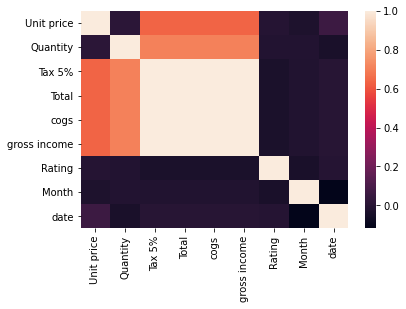

In [24]:
sns.heatmap(data.corr())

In [25]:
data.dtypes

Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Tax 5%           float64
Total            float64
Payment           object
cogs             float64
gross income     float64
Rating           float64
Month              int64
date               int64
dtype: object

In [26]:
data.City.dtypes

dtype('O')

get numeric columns and categorical columns seperately

In [27]:
num_cols = data.select_dtypes(include=["int64","float64"])
num_cols

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,date
0,74.69,7,26.1415,548.9715,522.83,26.1415,9.1,1,5
1,15.28,5,3.8200,80.2200,76.40,3.8200,9.6,3,8
2,46.33,7,16.2155,340.5255,324.31,16.2155,7.4,3,3
3,58.22,8,23.2880,489.0480,465.76,23.2880,8.4,1,27
4,86.31,7,30.2085,634.3785,604.17,30.2085,5.3,2,8
...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,2.0175,6.2,1,29
996,97.38,10,48.6900,1022.4900,973.80,48.6900,4.4,3,2
997,31.84,1,1.5920,33.4320,31.84,1.5920,7.7,2,9
998,65.82,1,3.2910,69.1110,65.82,3.2910,4.1,2,22


In [28]:
cat_cols = data.select_dtypes(exclude=["int64","float64"])
cat_cols

,Branch,City,Customer type,Gender,Product line,Payment
0,A,Yangon,Member,Female,Health and beauty,Ewallet
1,C,Naypyitaw,Normal,Female,Electronic accessories,Cash
2,A,Yangon,Normal,Male,Home and lifestyle,Credit card
3,A,Yangon,Member,Male,Health and beauty,Ewallet
4,A,Yangon,Normal,Male,Sports and travel,Ewallet
...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,Ewallet
996,B,Mandalay,Normal,Female,Home and lifestyle,Ewallet
997,A,Yangon,Member,Male,Food and beverages,Cash
998,A,Yangon,Normal,Male,Home and lifestyle,Cash


Plot of Total vs Rating

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


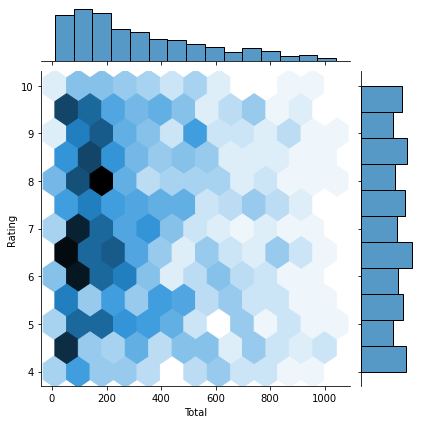

In [29]:
sns.jointplot(data['Total'],data['Rating'],kind='hex')

Distribution of Gross Income

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gross income', ylabel='Density'>

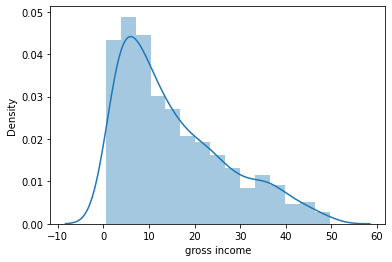

In [30]:
sns.distplot(data['gross income'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gross income'>

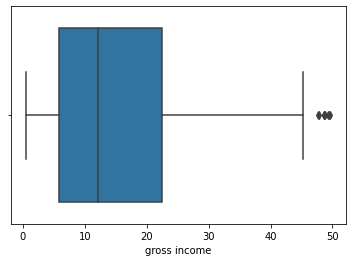

In [31]:
sns.boxplot(data['gross income'])

Plotting Gross income distribution

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gross income'>

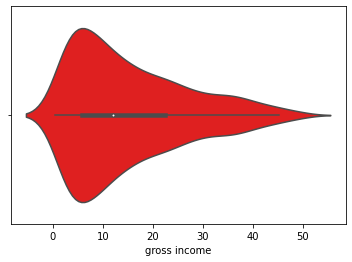

In [32]:
sns.violinplot(data['gross income'],color='red')

Plotting every relationship

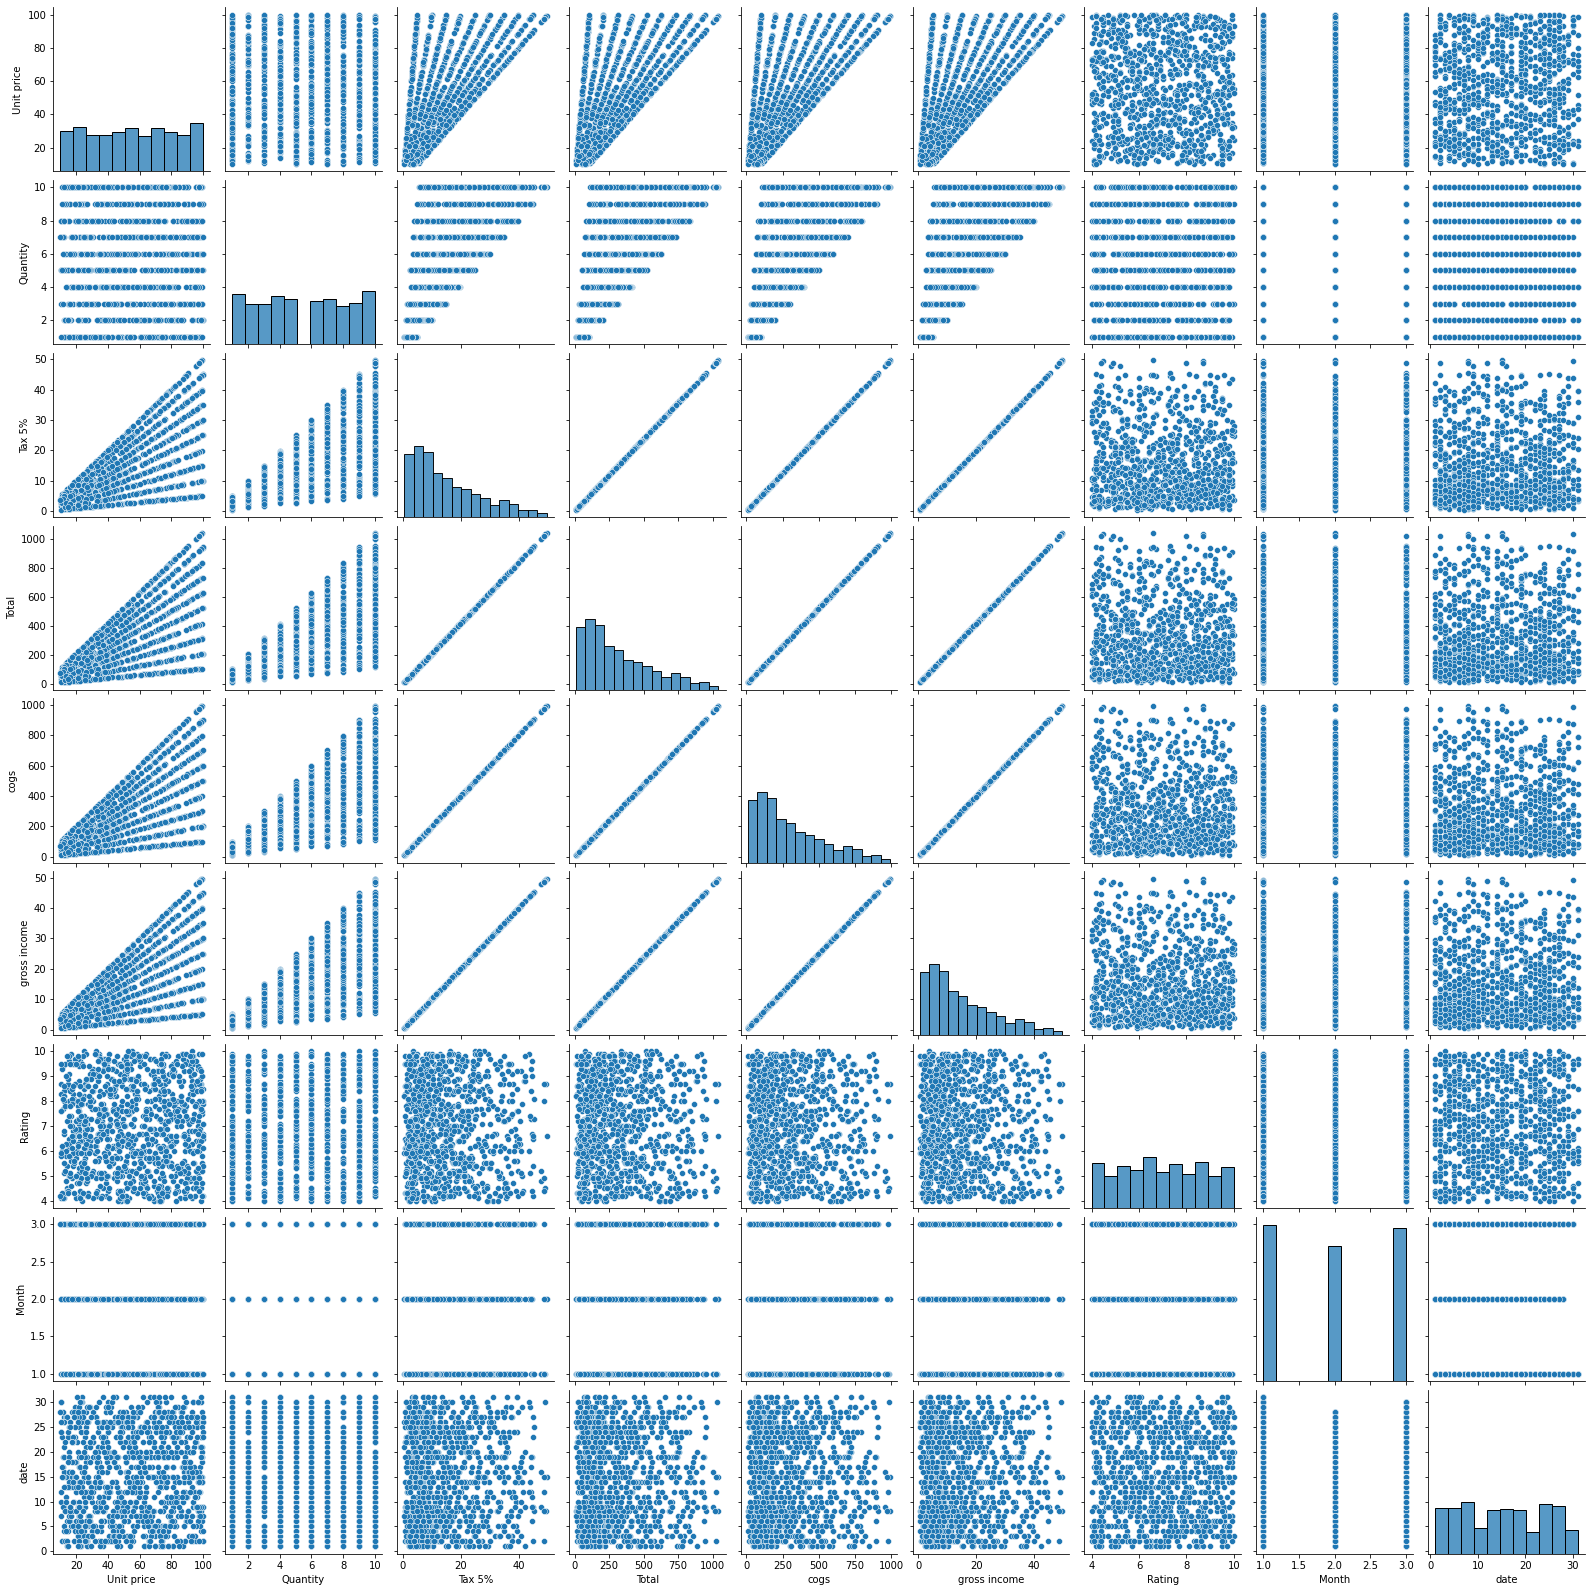

In [33]:
sns.pairplot(data)

<AxesSubplot:>

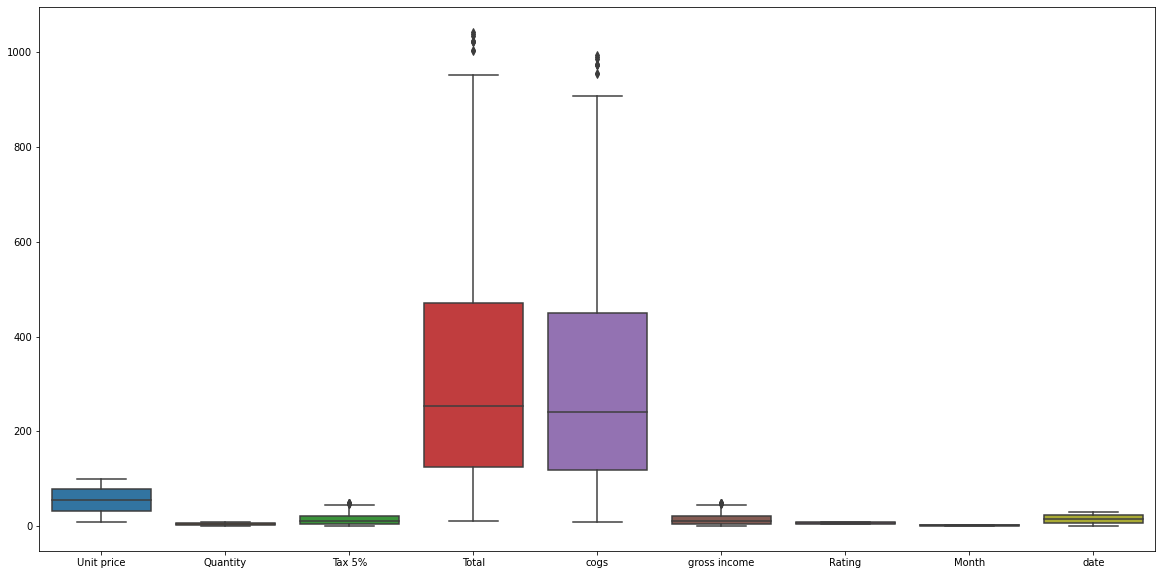

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

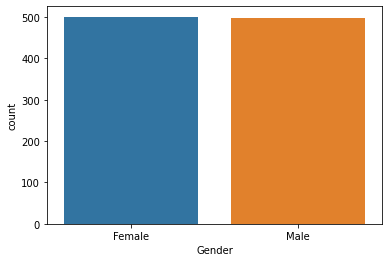

In [35]:
sns.countplot(data.Gender)

In [36]:
data.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [37]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Health and beauty'),
 Text(1, 0, 'Electronic accessories'),
 Text(2, 0, 'Home and lifestyle'),
 Text(3, 0, 'Sports and travel'),
 Text(4, 0, 'Food and beverages'),
 Text(5, 0, 'Fashion accessories')]

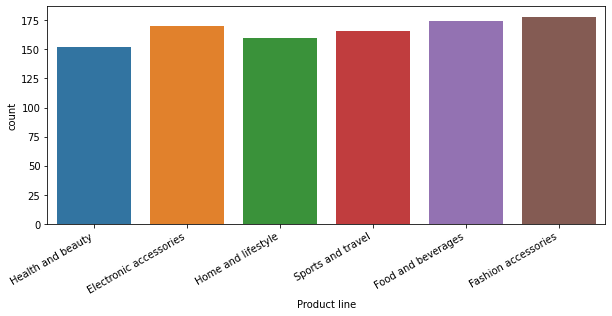

In [38]:
plt.figure(figsize=(10,4))
ax=sns.countplot(data['Product line'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')

In [39]:
data['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

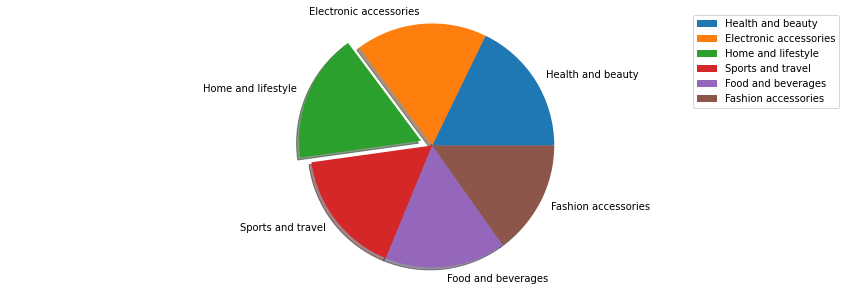

In [40]:
plt.figure(figsize=(15,5))
plt.pie(data['Product line'].value_counts(),labels=data['Product line'].unique(),startangle=0,shadow=True,explode=[0,0,0.1,0,0,0])
plt.axis("equal")
plt.legend(loc="upper right")
plt.show()

In [41]:
data.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [42]:
l = pd.Series(['y','n','n','m','y','m','y'])
pd.get_dummies(l,drop_first=True)

,n,y
0,0,1
1,1,0
2,1,0
3,0,0
4,0,1
5,0,0
6,0,1


In [43]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder 

In [45]:
le = LabelEncoder()

#data['city'] = le.fit_transform(data['City'])
data['Customer Type'] = le.fit_transform(data['Customer type'])
data.head(10)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Month,date,Customer Type
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,5,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,3,8,1
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,3,3,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,1,27,0
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2,8,1
5,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,Ewallet,597.73,29.8865,4.1,3,25,1
6,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,Ewallet,413.04,20.6520,5.8,2,25,0
7,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,Ewallet,735.60,36.7800,8.0,2,24,1
8,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,Credit card,72.52,3.6260,7.2,1,10,0
9,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,Credit card,164.52,8.2260,5.9,2,20,0


In [46]:
#data.drop(columns=['City','Customer type'],inplace=True)

In [47]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Month,date,Customer Type
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,5,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,3,8,1
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,3,3,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,1,27,0
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2,8,1


In [48]:
cat_cols.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], dtype='object')

In [49]:
enc_data = pd.get_dummies(data[['Branch', 'City', 'Gender', 'Product line', 'Payment']],drop_first=True)
enc_data.head()

,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,0,0,0,1,0,0,0,1,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,1,0,1,0
3,0,0,0,1,1,0,0,1,0,0,0,1
4,0,0,0,1,1,0,0,0,0,1,0,1


In [50]:
new_data = pd.concat([data,enc_data],axis=1)
new_data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,...,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,...,0,1,0,0,0,1,0,0,0,1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,...,1,0,0,0,0,0,0,0,0,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,...,0,1,1,0,0,0,1,0,1,0
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,...,0,1,1,0,0,1,0,0,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,...,0,1,1,0,0,0,0,1,0,1


In [51]:
data = new_data.drop(columns=['Branch', 'City', 'Gender', 'Product line', 'Payment','Customer type'])
data.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,date,Customer Type,...,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,548.9715,522.83,26.1415,9.1,1,5,0,...,0,1,0,0,0,1,0,0,0,1
1,15.28,5,3.8200,80.2200,76.40,3.8200,9.6,3,8,1,...,1,0,0,0,0,0,0,0,0,0
2,46.33,7,16.2155,340.5255,324.31,16.2155,7.4,3,3,1,...,0,1,1,0,0,0,1,0,1,0
3,58.22,8,23.2880,489.0480,465.76,23.2880,8.4,1,27,0,...,0,1,1,0,0,1,0,0,0,1
4,86.31,7,30.2085,634.3785,604.17,30.2085,5.3,2,8,1,...,0,1,1,0,0,0,0,1,0,1


In [52]:
data.Total.describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64

Scaling Numerical columns down to Standard Normal distribution.

In [53]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

num_cols_scaled = s.fit_transform(num_cols)

num_cols_data = pd.DataFrame(num_cols_scaled)

num_cols_data.head()

,0,1,2,3,4,5,6,7,8
0,0.718160,0.509930,0.919607,0.919607,0.919607,0.919607,1.238443,-1.189455,-1.180314
1,-1.525303,-0.174540,-0.987730,-0.987730,-0.987730,-0.987730,1.529527,1.206225,-0.835058
2,-0.352781,0.509930,0.071446,0.071446,0.071446,0.071446,0.248760,1.206225,-1.410484
3,0.096214,0.852165,0.675780,0.675780,0.675780,0.675780,0.830927,-1.189455,1.351560
4,1.156959,0.509930,1.267125,1.267125,1.267125,1.267125,-0.973790,0.008385,-0.835058


Replacing the columns with the standardized values

In [54]:
data['Unit price'] = num_cols_data.iloc[:,0]
data['Quantity'] = num_cols_data.iloc[:,1]
data['Tax 5%'] = num_cols_data.iloc[:,2]
data['Total'] = num_cols_data.iloc[:,3]
data['cogs'] = num_cols_data.iloc[:,4]
data['gross income'] = num_cols_data.iloc[:,5]
data['Rating'] = num_cols_data.iloc[:,6]
data['Month'] = num_cols_data.iloc[:,7]
data['date'] = num_cols_data.iloc[:,8]

data.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,date,Customer Type,...,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,0.718160,0.509930,0.919607,0.919607,0.919607,0.919607,1.238443,-1.189455,-1.180314,0,...,0,1,0,0,0,1,0,0,0,1
1,-1.525303,-0.174540,-0.987730,-0.987730,-0.987730,-0.987730,1.529527,1.206225,-0.835058,1,...,1,0,0,0,0,0,0,0,0,0
2,-0.352781,0.509930,0.071446,0.071446,0.071446,0.071446,0.248760,1.206225,-1.410484,1,...,0,1,1,0,0,0,1,0,1,0
3,0.096214,0.852165,0.675780,0.675780,0.675780,0.675780,0.830927,-1.189455,1.351560,0,...,0,1,1,0,0,1,0,0,0,1
4,1.156959,0.509930,1.267125,1.267125,1.267125,1.267125,-0.973790,0.008385,-0.835058,1,...,0,1,1,0,0,0,0,1,0,1


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gross income', ylabel='Density'>

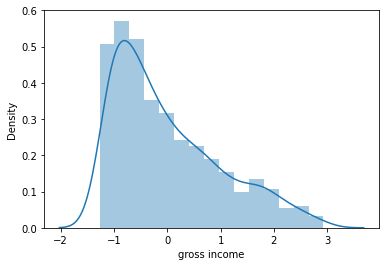

In [55]:
sns.distplot(data['gross income'])

After standardizing mean gets centered around zero and has unit standard deviation

In [56]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,date,Customer Type,...,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1.187939e-16,5.562217e-17,4.796163e-17,-2.420286e-17,-3.663736e-17,4.796163e-17,1.746381e-16,-2.906460e-16,-6.783463e-17,0.499000,...,0.32800,0.340000,0.499000,0.178000,0.174000,0.152000,0.160000,0.166000,0.311000,0.345000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.500249,...,0.46972,0.473946,0.500249,0.382704,0.379299,0.359201,0.366789,0.372267,0.463134,0.475606
min,-1.721668e+00,-1.543480e+00,-1.270692e+00,-1.270692e+00,-1.270692e+00,-1.270692e+00,-1.730607e+00,-1.189455e+00,-1.640654e+00,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.608740e-01,-8.590099e-01,-8.078714e-01,-8.078714e-01,-8.078714e-01,-8.078714e-01,-8.573570e-01,-1.189455e+00,-8.350581e-01,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.669588e-02,-1.745399e-01,-2.812422e-01,-2.812422e-01,-2.812422e-01,-2.812422e-01,1.589315e-02,8.384881e-03,-2.946181e-02,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.406991e-01,8.521652e-01,6.037682e-01,6.037682e-01,6.037682e-01,6.037682e-01,8.891433e-01,1.206225e+00,8.912197e-01,1.000000,...,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.672416e+00,1.536635e+00,2.928371e+00,2.928371e+00,2.928371e+00,2.928371e+00,1.762394e+00,1.206225e+00,1.811901e+00,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
data.columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income',
       'Rating', 'Month', 'date', 'Customer Type', 'Branch_B', 'Branch_C',
       'City_Naypyitaw', 'City_Yangon', 'Gender_Male',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Credit card',
       'Payment_Ewallet'],
      dtype='object')

In [58]:
data['Tax 5%'].corr(data['gross income'])

1.0

In [59]:
data['Total'].corr(data['cogs'])

1.0

In [60]:
data['gross income'].corr(data['cogs'])

1.0

In [61]:
data['Branch_B'].corr(data['Branch_C'])

-0.4925304620623063

In [62]:
data[['Tax 5%','Unit price','Quantity']].corrwith(data['Total'])

Tax 5%        1.000000
Unit price    0.633962
Quantity      0.705510
dtype: float64

In [63]:
data[['Tax 5%','Unit price','Quantity']].corrwith(data['cogs'])

Tax 5%        1.000000
Unit price    0.633962
Quantity      0.705510
dtype: float64

In [64]:
data.drop(columns=['Tax 5%','Total','cogs'],inplace = True)
data.head()

,Unit price,Quantity,gross income,Rating,Month,date,Customer Type,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,0.718160,0.509930,0.919607,1.238443,-1.189455,-1.180314,0,0,0,0,1,0,0,0,1,0,0,0,1
1,-1.525303,-0.174540,-0.987730,1.529527,1.206225,-0.835058,1,0,1,1,0,0,0,0,0,0,0,0,0
2,-0.352781,0.509930,0.071446,0.248760,1.206225,-1.410484,1,0,0,0,1,1,0,0,0,1,0,1,0
3,0.096214,0.852165,0.675780,0.830927,-1.189455,1.351560,0,0,0,0,1,1,0,0,1,0,0,0,1
4,1.156959,0.509930,1.267125,-0.973790,0.008385,-0.835058,1,0,0,0,1,1,0,0,0,0,1,0,1


<AxesSubplot:>

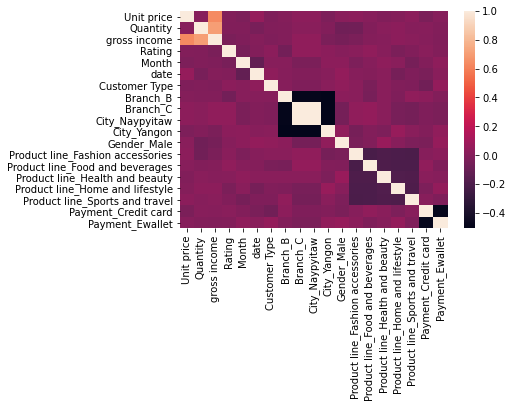

In [65]:
sns.heatmap(data.corr())

In [66]:
y = data.Rating
y.head()

0    1.238443
1    1.529527
2    0.248760
3    0.830927
4   -0.973790
Name: Rating, dtype: float64

In [67]:
x = data.drop(columns=['Rating'])
x.head()

,Unit price,Quantity,gross income,Month,date,Customer Type,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,0.718160,0.509930,0.919607,-1.189455,-1.180314,0,0,0,0,1,0,0,0,1,0,0,0,1
1,-1.525303,-0.174540,-0.987730,1.206225,-0.835058,1,0,1,1,0,0,0,0,0,0,0,0,0
2,-0.352781,0.509930,0.071446,1.206225,-1.410484,1,0,0,0,1,1,0,0,0,1,0,1,0
3,0.096214,0.852165,0.675780,-1.189455,1.351560,0,0,0,0,1,1,0,0,1,0,0,0,1
4,1.156959,0.509930,1.267125,0.008385,-0.835058,1,0,0,0,1,1,0,0,0,0,1,0,1


In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=30)

In [69]:
x.shape

(1000, 18)

In [70]:
y.shape

(1000,)

In [71]:
x_train.shape

(700, 18)

In [72]:
y_test.shape

(300,)

In [73]:
# from sklearn.model_selection import KFold

# k = KFold(n_splits=4)

In [74]:
# for train,test in k.split([1,2,3,4,5,6,7,8]):
#     print(train,test)

In [75]:
# from sklearn.model_selection import StratifiedKFold

# s = StratifiedKFold(n_splits=3)


In [76]:
# for train,test in s.split([0,1,2,3,4,5,6,7,8],[0,0,0,1,1,1,2,2,2]):
#     print(train,test)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gross income', ylabel='Rating'>

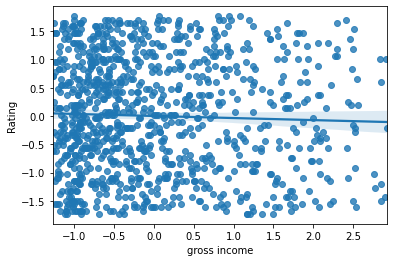

In [77]:
sns.regplot(data['gross income'],data.Rating)